## 神经网络
例子：

In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    #x[:,0]取所有行的第0个数据, X[:,1] 就是取所有行的第1个数据
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [3]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

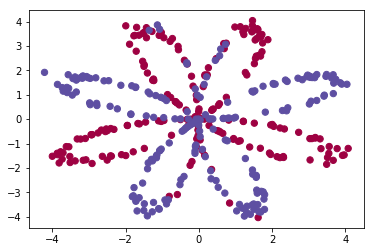

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

### 使用逻辑回归法
调用pytorch optimizer 

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

epoch: 20, loss: 0.9993695616722107
epoch: 40, loss: 0.6948263645172119
epoch: 60, loss: 0.6736535429954529
epoch: 80, loss: 0.6731647253036499
epoch: 100, loss: 0.673149824142456


C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [6]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'logistic regression')

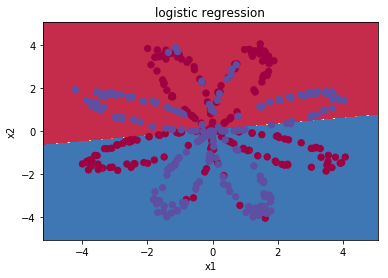

In [7]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

### 神经网络法

In [8]:
# 定义两层神经网络的参数
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # 隐藏层神经元个数 2
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

# 定义模型
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1) # 使用 PyTorch 自带的 tanh 激活函数
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

In [9]:
# 我们训练 10000 次
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.28805455565452576
epoch: 2000, loss: 0.27219170331954956
epoch: 3000, loss: 0.2650584280490875
epoch: 4000, loss: 0.26024824380874634
epoch: 5000, loss: 0.25681552290916443
epoch: 6000, loss: 0.25427284836769104
epoch: 7000, loss: 0.2523292005062103
epoch: 8000, loss: 0.2508033514022827
epoch: 9000, loss: 0.24957840144634247
epoch: 10000, loss: 0.24857588112354279


In [11]:

def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()


C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, '2 layer network')

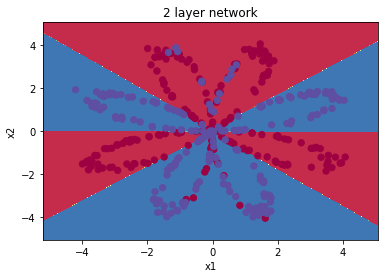

In [12]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

## Sequential 和 Module
如何保存 PyTorch 的模型

PyTorch 中的模块，Sequential 和 Module

对于前面的线性回归模型、 Logistic回归模型和神经网络，我们在构建的时候定义了需要的参数。这对于比较小的模型是可行的，但是对于大的模型，比如 100 层的神经网络，这个时候再去手动定义参数就显得非常麻烦，所以 PyTorch 提供了两个模块来帮助我们构建模型，一个是Sequential，一个是 Module

Sequential 允许我们构建序列化的模块，而 Module 是一种更加灵活的模型定义方式，我们下面分别用 Sequential 和 Module 来定义上面的神经网络。

In [15]:
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [16]:
# 序列模块可以通过索引访问每一层

seq_net[0] # 第一层

Linear(in_features=2, out_features=4, bias=True)

In [17]:
# 打印出第一层的权重

w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.0718, -0.5073],
        [-0.6002,  0.1722],
        [ 0.0745,  0.5968],
        [ 0.4017, -0.4476]], requires_grad=True)


In [18]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()

# 定义优化器
optim = torch.optim.SGD(param, 1.)#原来是自己的w1 w2 b1 b2

# 我们训练 10000 次
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


epoch: 1000, loss: 0.29317668080329895
epoch: 2000, loss: 0.2814203202724457
epoch: 3000, loss: 0.27287575602531433
epoch: 4000, loss: 0.26688292622566223
epoch: 5000, loss: 0.26285067200660706
epoch: 6000, loss: 0.259895920753479
epoch: 7000, loss: 0.25762173533439636
epoch: 8000, loss: 0.2558121681213379
epoch: 9000, loss: 0.25433486700057983
epoch: 10000, loss: 0.25310370326042175


最后我们讲一讲如何保存模型，保存模型在 PyTorch 中有两种方式，一种是将模型结构和参数都保存在一起，一种是只将参数保存下来，下面我们一一介绍。

In [19]:
# 将参数和模型保存在一起
torch.save(seq_net, 'save_seq_net.pth')
#torch.save里面有两个参数，第一个是要保存的模型，第二个参数是保存的路径，读取模型的方式也非常简单

In [21]:
# 读取保存的模型
seq_net1 = torch.load('save_seq_net.pth')
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

只保存参数而不保存模型结构

In [22]:
# 保存模型参数
torch.save(seq_net.state_dict(), 'save_seq_net_params.pth')

如果要重新读入模型的参数，首先我们需要重新定义一次模型，接着重新读入参数

In [23]:
seq_net2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

有这两种保存和读取模型的方法，我们推荐使用第二种，因为第二种可移植性更强

下面我们再用 Module 定义这个模型，下面是使用 Module 的模板

    class 网络名字(nn.Module):
        def __init__(self, 一些定义的参数):
            super(网络名字, self).__init__()
            self.layer1 = nn.Linear(num_input, num_hidden)
            self.layer2 = nn.Sequential(...)
            ...

            定义需要用的网络层

        def forward(self, x): # 定义前向传播
            x1 = self.layer1(x)
            x2 = self.layer2(x)
            x = x1 + x2
            ...
            return x
注意的是，Module 里面也可以使用 Sequential，同时 Module 非常灵活，具体体现在 forward 中，如何复杂的操作都能直观的在 forward 里面执行

下面我们照着模板实现一下上面的神经网络

In [24]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x 
    
mo_net = module_net(2, 4, 1)
# 定义优化器
optim = torch.optim.SGD(mo_net.parameters(), 1.)

# 我们训练 10000 次
for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

C:\Users\zhangwx\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 1000, loss: 0.29222336411476135
epoch: 2000, loss: 0.27849653363227844
epoch: 3000, loss: 0.2706146538257599
epoch: 4000, loss: 0.2651790678501129
epoch: 5000, loss: 0.25658413767814636
epoch: 6000, loss: 0.22874730825424194
epoch: 7000, loss: 0.223283588886261
epoch: 8000, loss: 0.22029851377010345
epoch: 9000, loss: 0.21822147071361542
epoch: 10000, loss: 0.21660232543945312
